In [84]:
from vaja3_predloga import dekompresiraj, kompresiraj, izracunaj_velikost
import numpy as np
from colorama import Fore
import hashlib
from matplotlib import pyplot as plt

# 1. Naloga:
- Implementacija dekoderja
- Preizkus delovanja na besedilni datoteki
- Preverjanje delovanja z MD5 izvlecki

## 1.1.
Glej predlogo `./vaja_3_predloga.py`

## 1.2. Preizkus delovanja na besedilni datoteki

In [85]:
with open("./besedilo.txt", encoding="utf-8") as textfile:
    text = textfile.read()
bintext = bytes(text, 'utf-8')
textfile.close()
KT = kompresiraj(bintext)
print(KT)
ST = dekompresiraj(KT)
print(ST)
with open("./novobesedilo.txt", 'wb') as newfile:
    newfile.write(ST)


[71, 111, 115, 112, 111, 100, 105, 110, 32, 70, 114, 97, 110, 106, 111, 10, 10, 265, 267, 32, 77, 97, 115, 101, 108, 106, 271, 90, 97, 108, 111, 197, 190, 110, 105, 107, 58, 275, 97, 116, 105, 99, 97, 32, 83, 285, 118, 101, 110, 115, 107, 97, 44, 32, 76, 106, 117, 98, 280, 267, 298, 49, 57, 49, 51, 271, 118, 105, 114, 292, 100, 108, 105, 98, 46, 115, 105, 32, 40, 105, 122, 118, 111, 114, 110, 298, 261, 103, 105, 116, 284, 335, 97, 99, 105, 106, 97, 41, 308, 87, 290, 105, 86, 323, 333, 111, 196, 141, 105, 197, 161, 362, 303, 106, 101, 32, 262, 32, 259, 112, 266, 118, 107, 105, 41, 271, 381, 381, 73, 115, 295, 110, 117, 32, 114, 101, 349, 373, 298, 117, 116, 391, 105, 33, 271, 66, 257, 303, 305, 298, 375, 105, 115, 301, 296, 97, 46, 382, 271, 49, 412, 271, 75, 111, 32, 369, 32, 98, 105, 108, 264, 266, 110, 99, 370, 358, 108, 97, 114, 32, 100, 111, 107, 111, 110, 362, 284, 32, 108, 46, 32, 49, 56, 55, 55, 445, 115, 337, 421, 365, 116, 117, 261, 421, 340, 32, 396, 104, 289, 378, 308, 278, 

b'Gospodin Franjo\n\nFran Maselj\n\nZalo\xc5\xbenik: Matica Slovenska, Ljubljana 1913\n\nvir: dlib.si (izvorna digitalizacija), WikiVir (o\xc4\x8di\xc5\xa1\xc4\x8denje in popravki)\n\n\n\n\n\n\n\nIstinu reci pa uteci!\n\nBosenska prislovica.\n\n\n\n\n\n1.\n\n\nKo je bil France Vilar dokon\xc4\x8dal l. 1877. svoje \xc5\xa1tudije na tehniki, se je povrnil kot nadobuden in\xc5\xbeenir v svojo domovino. \xc4\x8cez zimo je bival doma na Gorenjskem, spomladi je za\xc4\x8del iskati slu\xc5\xbebo. Pa ni\xc4\x8d primernega ni mogel dobiti. \xc5\xbde je hotel zapustiti o\xc5\xbejo domovino in se nameraval ogledati po \xc5\xa1irni Avstriji, ni li kje posla zanj, ko ga nenadoma doleti ukaz, naj se kot rezervni poro\xc4\x8dnik oglasi pri svojem polku, ki je bil namenjen, da se udele\xc5\xbei zasedbe Bosne in Hercegovine. Tisti polk je bil prideljen Saparijevi diviziji, ki je tistihmal bila prodirala od Doboja ob reki Spre\xc4\x8di proti vzhodu, pa skraja ni imela sre\xc4\x8de in je \xc5\xa1ele okre

## 1.3. Preverjanje integritete kompresiranih podatkov

In [86]:
def compute_md5(data):
    md5_hash = hashlib.md5()
    md5_hash.update(data)
    return md5_hash.hexdigest()

original_md5 = compute_md5(bintext)
decoded_md5 = compute_md5(ST)

print(f"Originalni MD5: {original_md5}\nDekompresiran MD5: {decoded_md5}\n")
if original_md5 == decoded_md5:
    print("Uspesno kodiranje, nespremenjena integriteta podatkov")
else:
    print("Neuspesno kodiranje, podatki so bili pokvarjeni")


Originalni MD5: 727c3bd61031d70c31549a0ca27eb876
Dekompresiran MD5: 727c3bd61031d70c31549a0ca27eb876

Uspesno kodiranje, nespremenjena integriteta podatkov


# 2. Naloga:
- Implementacija izracuna velikosti kompresiranega sporocila
- Preizkus uspesnosti kompresije na razlicnih vrstah datotek
- Vrednotenje razmerja med dolzino sporocila in uspesnostjo kompresije

## 2.1. Izracun velikosti kompresiranega sporocila
(za izvorno kodo, glej: `./vaja_3_predloga.py`)

In [87]:
izracunaj_velikost(KT)

423926

## 2.2. Preizkus uspesnosti na razlicnih tipih datotek

In [88]:
datoteke = ["./audio_test_uncompressed.wav", "./audio_test_losless.flac", "./audio_test_320.mp3"]
velikosti = {}
for datoteka in datoteke:
    velikosti[datoteka] = {}
    datoteka_bytes = bytes(np.fromfile(datoteka))
    kompresirana = kompresiraj(datoteka_bytes)
    velikost_komp = izracunaj_velikost(kompresirana)
    velikost_raw = izracunaj_velikost(datoteka_bytes)
    velikosti[datoteka]["kompresirana"] = velikost_komp
    velikosti[datoteka]["izvirna"] = velikost_raw
    print(f"Velikost datoteke: {datoteka}\n\t{Fore.RED}-Izvirna: {velikost_raw} bajtov\n\t{Fore.GREEN}-Kompresirana: {velikost_komp} bajtov{Fore.RESET}")
    
    

Velikost datoteke: ./audio_test_uncompressed.wav
	-Izvirna: 145448746 bajtov
	-Kompresirana: 53372167 bajtov
Velikost datoteke: ./audio_test_losless.flac
	-Izvirna: 97617170 bajtov
	-Kompresirana: 39985245 bajtov
Velikost datoteke: ./audio_test_320.mp3
	-Izvirna: 30113070 bajtov
	-Kompresirana: 13051216 bajtov


In [89]:
for datoteka, velikost in velikosti.items():
    ratio =velikost['izvirna']/velikost['kompresirana']
    print(f"Uspesnost kompresije datoteke: {datoteka} je: {Fore.GREEN}{ratio}{Fore.RESET}")

Uspesnost kompresije datoteke: ./audio_test_uncompressed.wav je: 2.725179698999293
Uspesnost kompresije datoteke: ./audio_test_losless.flac je: 2.4413297955283255
Uspesnost kompresije datoteke: ./audio_test_320.mp3 je: 2.307299948142763


## 2.3. Vrednotenje razmerja med dolzino sporocila in uspesnostjo kompresije

In [90]:
with open("./besedilo.txt", encoding="utf-8") as textfile:
    text = textfile.read()
    bintext = bytes(text, 'utf-8')
velikosti = {}
for i in range (1,11):
    velikosti[f"1/{i}"] = {}
    datoteka_bytes = bintext[:int(len(bintext)/i)]
    kompresirana = kompresiraj(datoteka_bytes)
    velikost_komp = izracunaj_velikost(kompresirana)
    velikost_raw = izracunaj_velikost(datoteka_bytes)
    velikosti[f"1/{i}"]["kompresirana"] = velikost_komp
    velikosti[f"1/{i}"]["izvirna"] = velikost_raw
    print(f"Velikost pri dolzini: 1/{i}:\n\t{Fore.RED}-Izvirna: {velikost_raw} bajtov\n\t{Fore.GREEN}-Kompresirana: {velikost_komp} bajtov{Fore.RESET}")
    

Velikost pri dolzini: 1/1:
	-Izvirna: 2466718 bajtov
	-Kompresirana: 423926 bajtov
Velikost pri dolzini: 1/2:
	-Izvirna: 1168600 bajtov
	-Kompresirana: 221198 bajtov
Velikost pri dolzini: 1/3:
	-Izvirna: 757348 bajtov
	-Kompresirana: 150571 bajtov
Velikost pri dolzini: 1/4:
	-Izvirna: 551991 bajtov
	-Kompresirana: 114505 bajtov
Velikost pri dolzini: 1/5:
	-Izvirna: 435111 bajtov
	-Kompresirana: 93347 bajtov
Velikost pri dolzini: 1/6:
	-Izvirna: 357189 bajtov
	-Kompresirana: 78785 bajtov
Velikost pri dolzini: 1/7:
	-Izvirna: 301530 bajtov
	-Kompresirana: 67985 bajtov
Velikost pri dolzini: 1/8:
	-Izvirna: 259905 bajtov
	-Kompresirana: 59687 bajtov
Velikost pri dolzini: 1/9:
	-Izvirna: 229241 bajtov
	-Kompresirana: 53356 bajtov
Velikost pri dolzini: 1/10:
	-Izvirna: 204712 bajtov
	-Kompresirana: 48386 bajtov


In [80]:
for index, dolzina in velikosti.items():
    ratio =dolzina['izvirna']/dolzina['kompresirana']
    print(f"Uspesnost kompresije datoteke dolzine: {index} izvirne je: {Fore.GREEN}{ratio}{Fore.RESET}")

Uspesnost kompresije datoteke dolzine: 1/1 izvirne je: 5.818746668050556
Uspesnost kompresije datoteke dolzine: 1/2 izvirne je: 5.2830495754934494
Uspesnost kompresije datoteke dolzine: 1/3 izvirne je: 5.029839743376879
Uspesnost kompresije datoteke dolzine: 1/4 izvirne je: 4.820671586393607
Uspesnost kompresije datoteke dolzine: 1/5 izvirne je: 4.661221035491232
Uspesnost kompresije datoteke dolzine: 1/6 izvirne je: 4.533718347401155
Uspesnost kompresije datoteke dolzine: 1/7 izvirne je: 4.435243068323895
Uspesnost kompresije datoteke dolzine: 1/8 izvirne je: 4.354465796572118
Uspesnost kompresije datoteke dolzine: 1/9 izvirne je: 4.296442761826224
Uspesnost kompresije datoteke dolzine: 1/10 izvirne je: 4.230810565039474


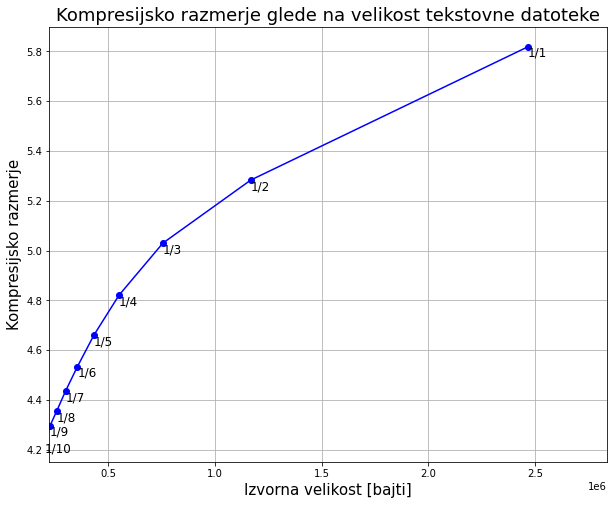

In [97]:
original_sizes = [info['izvirna'] for info in velikosti.values()]
compression_ratios = [info['izvirna'] / info['kompresirana'] for info in velikosti.values()]

# Plot
plt.figure(figsize=(10, 8))
plt.plot(original_sizes, compression_ratios, marker="o", color="blue")
x_min, x_max = min(original_sizes), max(original_sizes)
plt.xlim(x_min * 1.1, x_max * 1.15)
# Annotate points with filenames
for key, x, y in zip(velikosti.keys(), original_sizes, compression_ratios):
    plt.text(x, y, key, fontsize=12, ha='left', va='top')

# Labels and title
plt.xlabel('Izvorna velikost [bajti]', fontsize=15)
plt.ylabel('Kompresijsko razmerje', fontsize=15)
plt.title('Kompresijsko razmerje glede na velikost tekstovne datoteke', fontsize=18)
plt.grid(True)

# Show plot
plt.savefig("uspesnost_kompresije.svg", format='svg')
plt.show()